# Document Loading

## Retrieval augmented generation
 
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution. 

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc). 

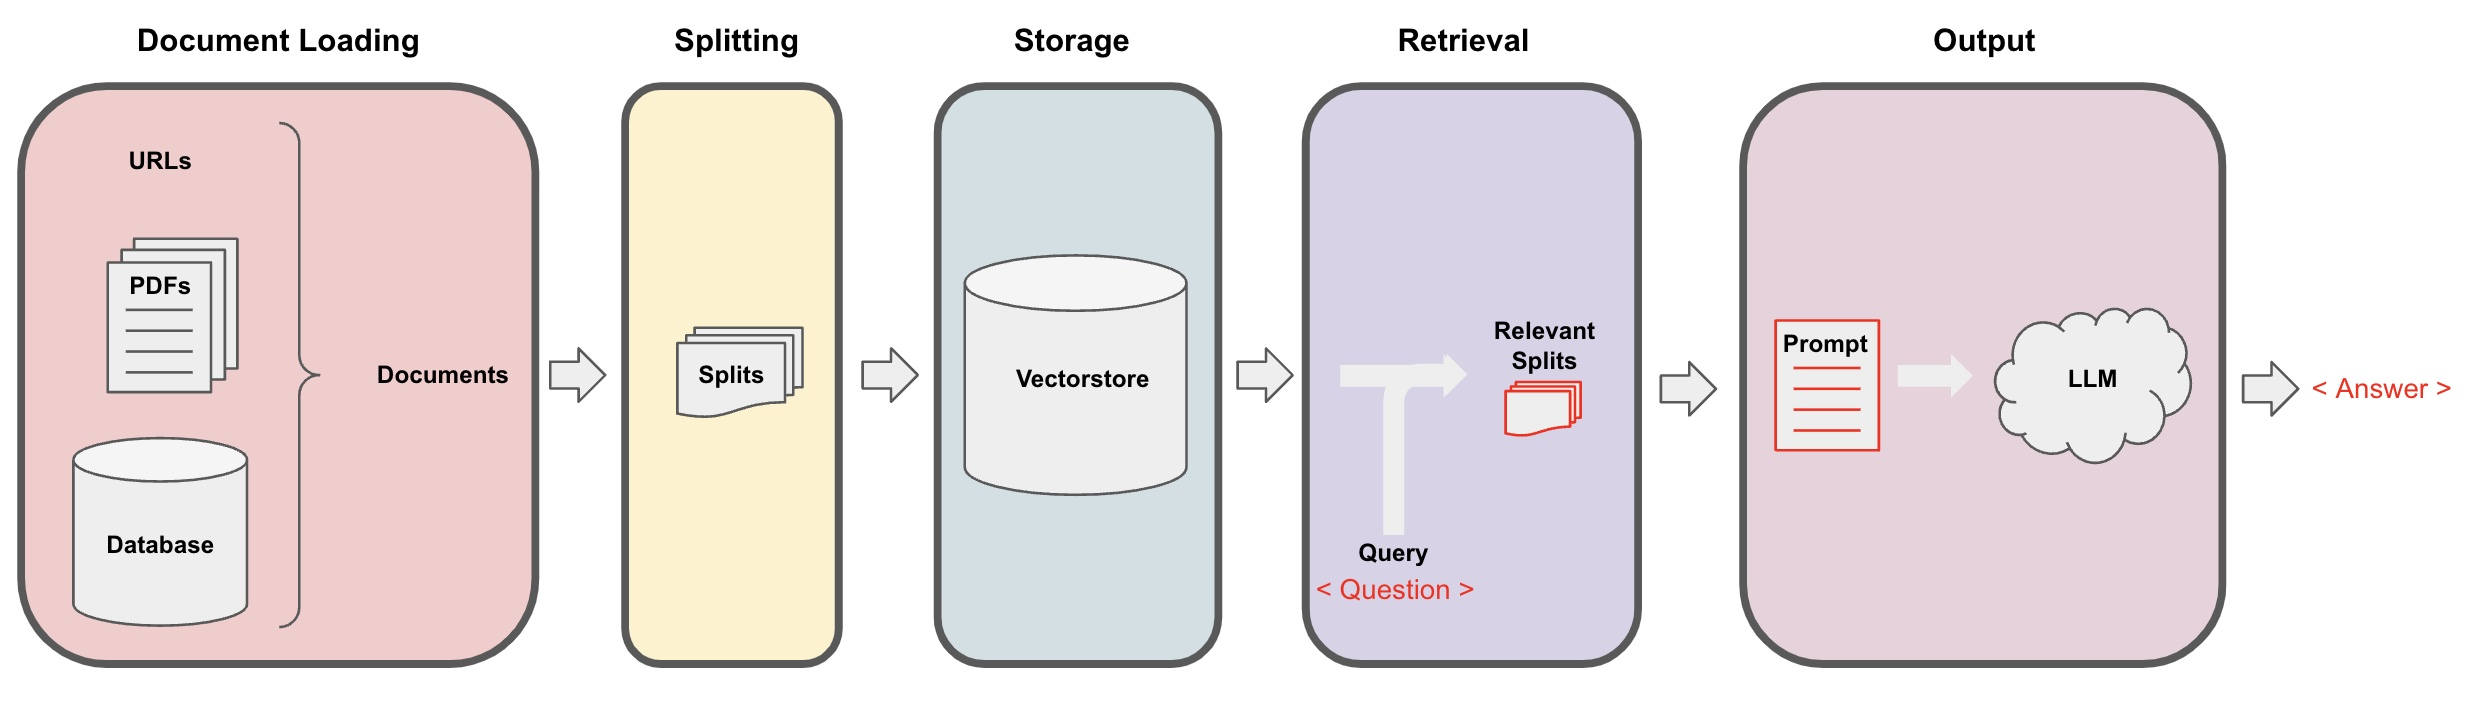

In [ ]:
#! pip install langchain

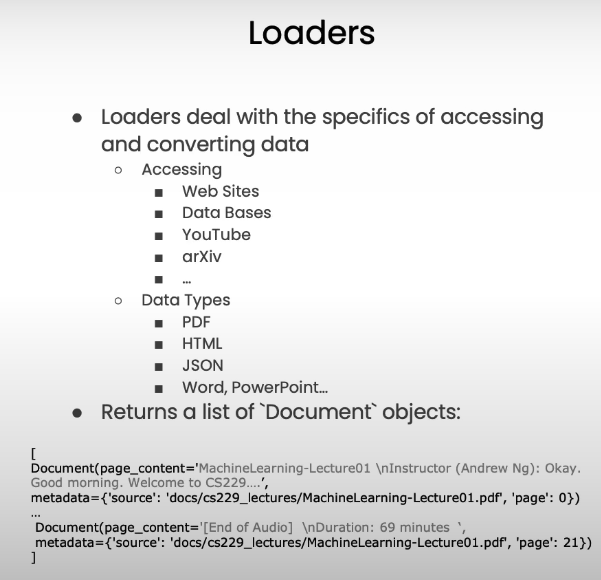

https://python.langchain.com/v0.2/docs/concepts/#document-loaders

https://python.langchain.com/v0.2/docs/how_to/#document-loaders

- Load documents into a standard format

## PDFs

Let's load a PDF [transcript](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture01.pdf) from Andrew Ng's famous CS229 course! These documents are the result of automated transcription so words and sentences are sometimes split unexpectedly.

In [ ]:
# The course will show the pip installs you would need to install packages on your own machine.
# These packages are already installed on this platform and should not be run again.
#! pip install pypdf 

In [2]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("data/docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [3]:
len(pages)

22

In [4]:
page = pages[0]

In [5]:
print(page.page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


In [6]:
page.metadata

{'source': 'data/docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

## YouTube

In [7]:
from langchain_community.document_loaders.blob_loaders.youtube_audio import (
    YoutubeAudioLoader,
)


from langchain_community.document_loaders.generic import GenericLoader
from langchain_community.document_loaders.parsers import (
    OpenAIWhisperParser,
)

from langchain_community.document_loaders import YoutubeLoader



In [11]:
# https://python.langchain.com/v0.2/docs/integrations/document_loaders/youtube_audio/
loader = YoutubeLoader.from_youtube_url(
    "https://www.youtube.com/watch?v=IyvlgRf7u3Y", add_video_info=False
)

loader.load()

[Document(metadata={'source': 'IyvlgRf7u3Y'}, page_content="when you are reading notes only a small fraction of the data are registered in the memory the rest will vanish even before you close the book if you were using passive learning methods like reading notes summarizing highlighting or listening to lectures or podcasts this video is exactly for you in this video you'll learn how active recall builds a strong memory and the exact methods i used in medical school to get great results i also have a challenge for you take a piece of paper and create a short note from this video at the end of the video i will test the strength of your passive note-taking what is active recall this is mark and he's reading some notes some of his brain areas seem to be highly active the occipital cortex creates images of what he sees but the interpretation of written word is done by the angular gyrus and the fusiform cortex after the analysis data are sent to the hippocampus to store as memory you can st

In [11]:
# ! pip install yt_dlp
# ! pip install pydub

In [9]:
# https://python.langchain.com/v0.1/docs/integrations/document_loaders/youtube_transcript/
urls = ["https://www.youtube.com/watch?v=IyvlgRf7u3Y"]
save_dir="data/docs/youtube/"

loader = GenericLoader(YoutubeAudioLoader(urls, save_dir), OpenAIWhisperParser())

docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=IyvlgRf7u3Y
[youtube] IyvlgRf7u3Y: Downloading webpage
[youtube] IyvlgRf7u3Y: Downloading ios player API JSON
[youtube] IyvlgRf7u3Y: Downloading player 0e90208b
[youtube] IyvlgRf7u3Y: Downloading m3u8 information
[info] IyvlgRf7u3Y: Downloading 1 format(s): 140
[download] Destination: data/docs/youtube//How to do ACTIVE RECALL Effectively？ (4 Techniques worked for me).m4a
[download] 100% of    3.60MiB in 00:00:00 at 10.17MiB/s  
[FixupM4a] Correcting container of "data/docs/youtube//How to do ACTIVE RECALL Effectively？ (4 Techniques worked for me).m4a"
[ExtractAudio] Not converting audio data/docs/youtube//How to do ACTIVE RECALL Effectively？ (4 Techniques worked for me).m4a; file is already in target format m4a
Transcribing part 1!


In [10]:
docs[0].page_content[0:500]

'When you are reading notes, only a small fraction of the data are registered in the memory. The rest will vanish even before you close the book. If you are using passive learning methods like reading notes, summarizing, highlighting or listening to lectures or podcasts, this video is exactly for you. In this video, you will learn how active recall builds a strong memory and the exact methods I used in medical school to get great results. I also have a challenge for you. Take a piece of paper and'

## URLs

In [15]:
from langchain_community.document_loaders import WebBaseLoader
# https://python.langchain.com/v0.2/docs/integrations/document_loaders/web_base/

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/benefits-and-perks.md")

In [16]:
docs = loader.load()

In [17]:
print(docs[0].page_content[:500])










ESPN - Serving Sports Fans. Anytime. Anywhere.




























































































        Skip to main content
    

        Skip to navigation
    

































<

>









MenuESPN





scores



NFLNBAMLBOlympicsSoccerWNBA…BoxingCFLNCAACricketF1GolfHorseLLWSMMANASCARNBA G LeagueNBA Summer LeagueNCAAFNCAAMNCAAWNHLNWSLPLLProfessional WrestlingRacingRN BBRN FBRugbySports BettingTennisX GamesUFLMore ESPNFantas


## Notion

Follow steps [here](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) for an example Notion site such as [this one](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f):

* Duplicate the page into your own Notion space and export as `Markdown / CSV`.
* Unzip it and save it as a folder that contains the markdown file for the Notion page.
 

![image.png](./data/img/image.png)

In [18]:
from langchain_community.document_loaders import NotionDirectoryLoader
# https://python.langchain.com/v0.2/docs/integrations/document_loaders/notion/

loader = NotionDirectoryLoader("data/docs/Notion_DB")
docs = loader.load()

In [19]:
print(docs[0].page_content[0:200])

# Blendle's Employee Handbook

This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that


In [20]:
docs[0].metadata

{'source': "data/docs/Notion_DB/Blendle's Employee Handbook dbb455f918db4cc9b3de9108622d76ef.md"}